## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Overview

* Observations<br>
  - Shape - 5000 records with 14 features<br>
  - Data types - 13 int64, 1 float64
* Sanity checks<br>
  - There are no missing / duplicate values. Atleast nothing is set a NaN or none.
  - Experience is showing negtive data which is more of an anomally

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LearnPython/Loan_Modelling.csv")

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.shape

(5000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print((df['Age']<0).sum())
print((df['Experience']<0).sum())
print((df['Income']<0).sum())
print((df['Family']<0).sum())
print((df['CCAvg']<0).sum())
print((df['Mortgage']<0).sum())

0
52
0
0
0
0


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
  - 69.24% customers do not have a mortgage.
  - Rest of the mortagage values distribution is les than a percentage and hence looks like outliers.
2. How many customers have credit cards?
  - 1470 customers use a credit card issued by any other Bank (excluding All life Bank).
  - There is no data feature that suggests how many customers have a credit card from Alllife Bank
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
  - Income (Anual Income) has a moderate correlation with personal loan - 0.5.
  - There is no real strong correlated feature in this data set having a corelation higher than 0.7 with loan purchase.
    
4. How does a customer's interest in purchasing a loan vary with their age?
  - Age and loan purchanse do not seems to be related
5. How does a customer's interest in purchasing a loan vary with their education?
  - Education has a very weak corelation with loan purchase

6. Weak correlations with personal loan target attribute -
  - CCAvg (Average spending on credit cards) - 0.37
  - CD_Account (customer have a certificate of deposit (CD) account) - 0.32

7. All other attributes have a very week corelation with target attribute loan purchase

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64
Mortgage
0      69.24
98      0.34
103     0.32
89      0.32
91      0.32
       ...  
550     0.02
283     0.02
612     0.02
590     0.02
541     0.02
Name: proportion, Length: 347, dtype: float64


<Axes: >

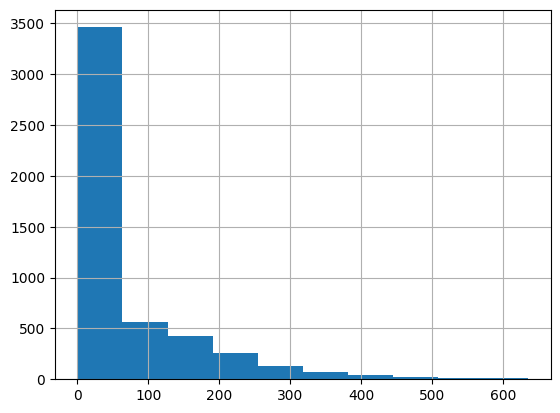

In [ ]:
#1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
print(df['Mortgage'].describe())
distribution = df['Mortgage'].value_counts(normalize=True) * 100
print(distribution)
df['Mortgage'].hist()

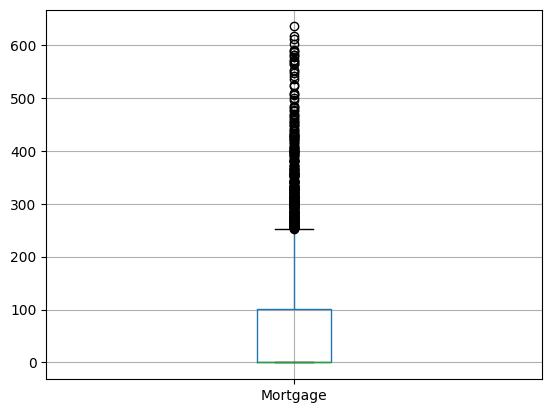

In [ ]:
df.boxplot(column=['Mortgage'])
plt.show()

In [ ]:
#2. How many customers have credit cards?
df['CreditCard'].value_counts()

,count
CreditCard,
0,3530
1,1470


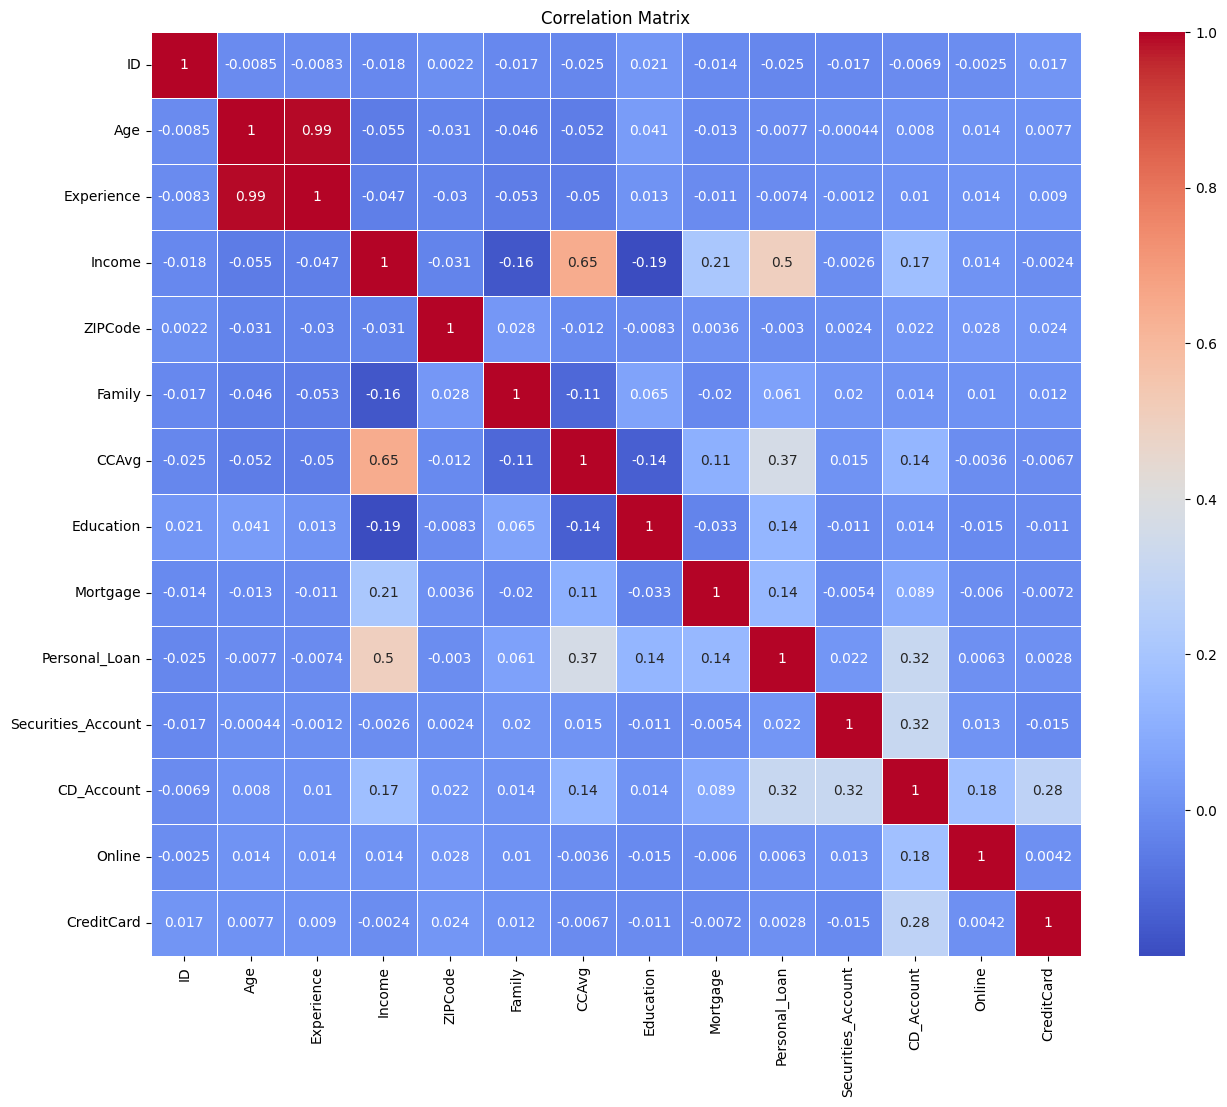

In [ ]:
#study corelation between various features
correlation_matrix = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.7)
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

* Missing value treatment
  - Experience column has some nagative values. Converting negative values to positive as no one can have negative experience snd hence assuming it to be a human error of adding a negative sign by mistake
* Feature engineering (if needed)
  - data dictionary has columns with fixed values as 0,1,2,3 which mesns these are categorical values rather than data. Coverting them to category.
    - Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
    - Personal_Loan: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
    - Securities_Account: Does the customer have securities account with the bank? (0: No, 1: Yes)
    - CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
    - Online: Do customers use internet banking facilities? (0: No, 1: Yes)
    - CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)
    - zip code though looks like number, it is not really a numeric data. As per USPS definitions -
      - The first number in the five-digit ZIP Code represents a general geographic area of the nation, “0” in the east, moving to “9” in the west.
      - The next two numbers represent regional areas, and the final two identify specific Post Offices
      - so picking the first 3 digits of zip code to get a regional sense
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [8]:
#Check the abnormal values in experience as found during data analysis
df[df['Experience']<0]['Experience'].value_counts(normalize=True)

,proportion
Experience,
-1,0.634615
-2,0.288462
-3,0.076923


In [9]:
#converting negative values to positive as no one can have negative experience snd hence assuming it to be a human error of adding a negative sign by mistake
df['Experience']=np.abs(df['Experience'])
df[df['Experience']<0]['Experience'].value_counts(normalize=True)

,proportion
Experience,


In [10]:
#Feature engineering - data dictionary has columns with fixed values as 0,1,2,3 which mesns these are categorical values rather than data. Coverting them to category.
#Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
#Personal_Loan: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
#Securities_Account: Does the customer have securities account with the bank? (0: No, 1: Yes)
#CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
#Online: Do customers use internet banking facilities? (0: No, 1: Yes)
#CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)
for col in ['Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']:
  df[col]=df[col].astype('category')

In [11]:
#zip code though looks like number, it is not really a numeric data. As per USPS definitions -
#The first number in the five-digit ZIP Code represents a general geographic area of the nation, “0” in the east, moving to “9” in the west.
#The next two numbers represent regional areas, and the final two identify specific Post Offices
#so picking the first 3 digits of zip code to get a regional sense
df['ZIPCode']=(df['ZIPCode'].astype(str).str[:3]).astype('category')

## Model Building

### Model Evaluation Criterion

* Since the target analysis is on personal loan, taking that into Y axis and leaving rest into X axis.
* Also, Experience is anyway very stronly correlated to age and as such has a very weak correaltion with personal loan, hence dropping that from X axis
* Then on X axis, since zip was converted to first 3 characters to get a regional sense and converted to category, using dummies to get to properly compare the data.
* Similarly, since the purpose of abnalysis is to look to features against personal load, as education being 1,2 and 3 is more categorical value (already converted) and henec getting dummies to just check if under grad, grad or advance.
* Once all values on x axis is numeric, converting it to float for better accuracy in computations that follow
* Post this split the data into test and train sets with 30% test data and 70% train data set
* also, to ensure each execution does not produce random results, fixing the random state


### Model Building

In [30]:
Y = df["Personal_Loan"]
X = df.drop(["Personal_Loan", "Experience"], axis=1)
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42
)

In [31]:
#Creating decison tree model
dtree = DecisionTreeClassifier(criterion="gini", random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Text(0.5, 14.722222222222216, 'Predicted label')

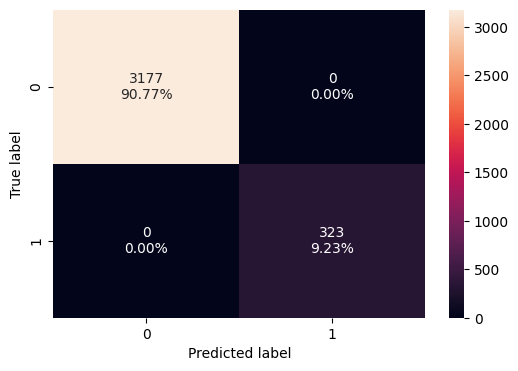

In [32]:
#plot confusion matrix to check model performance
y_predict = dtree.predict(X_train)
conf_mtrx = confusion_matrix(y_train, y_predict)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / conf_mtrx.flatten().sum())] for item in conf_mtrx.flatten()]).reshape(2, 2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mtrx, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [34]:
#Classify model performance
predict = dtree.predict(X_train)

# Compute F1-score
f1 = f1_score(y_train, predict)

# Compute Accuracy
accuracy = accuracy_score(y_train, predict)

# Compute Precision
precision = precision_score(y_train, predict)

# Compute Recall
recall = recall_score(y_train, predict)

results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})

# Display the results
print(results_df)

      Metric  Value
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1 Score    1.0


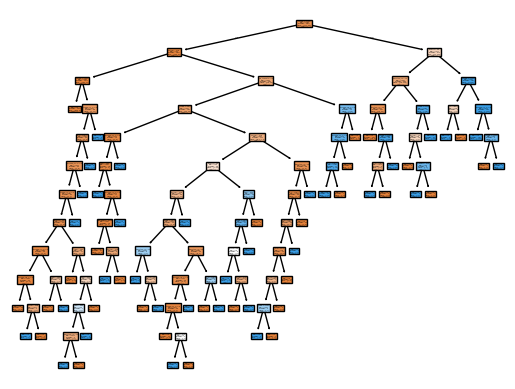

In [35]:
# Visualize the decision tree
plot_tree(dtree, filled=True, feature_names=X_train.columns, class_names=[str(c) for c in dtree.classes_])
plt.show()

In [71]:
#Show decision tree rules
print(tree.export_text(dtree, feature_names=list(X_train.columns), show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2546.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- ZIPCode_931 <= 0.50
|   |   |   |   |--- ID <= 4936.50
|   |   |   |   |   |--- ZIPCode_949 <= 0.50
|   |   |   |   |   |   |--- ZIPCode_906 <= 0.50
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- ZIPCode_930 <= 0.50
|   |   |   |   |   |   |   |   |   |--- ZIPCode_945 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [39.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- ZIPCode_945 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- CCAvg <= 0.85
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- CCAvg >  0.85
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- ZIPCode_930 >  0.50
|   |   |   |   |   |   |   |   |   |--

In [37]:
# Get feature importances
importances = dtree.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Gini Importance of Columns:")
print(feature_importances)

Gini Importance of Columns:
        Feature  Importance
2        Income    0.307328
3        Family    0.230854
66  Education_2    0.166739
67  Education_3    0.134793
4         CCAvg    0.063031
..          ...         ...
60  ZIPCode_957    0.000000
63  ZIPCode_960    0.000000
62  ZIPCode_959    0.000000
65  ZIPCode_966    0.000000
64  ZIPCode_961    0.000000

[68 rows x 2 columns]


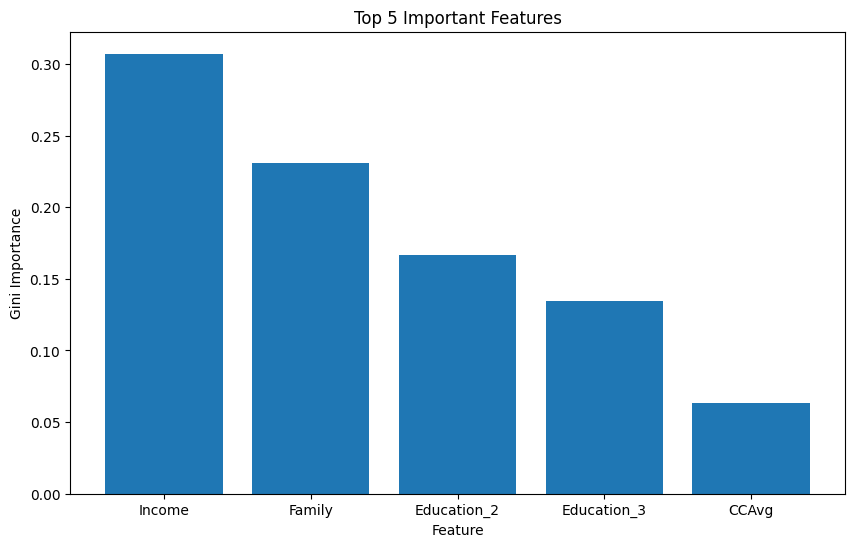

In [38]:
# Plot the top 5 important features
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'][:5], feature_importances['Importance'][:5])
plt.xlabel('Feature')
plt.ylabel('Gini Importance')
plt.title('Top 5 Important Features')
plt.show()

Text(0.5, 14.722222222222216, 'Predicted label')

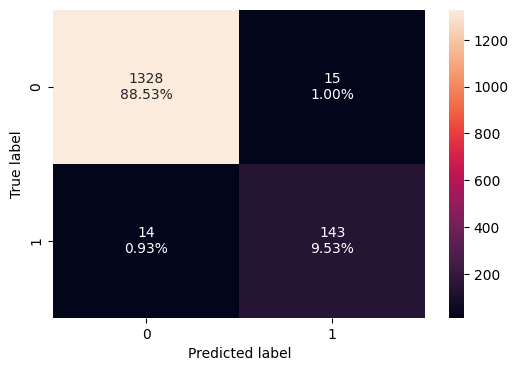

In [39]:
#checking model performance on test data
y_predict_test = dtree.predict(X_test)
conf_mtrx_test = confusion_matrix(y_test, y_predict_test)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / conf_mtrx_test.flatten().sum())] for item in conf_mtrx_test.flatten()]).reshape(2, 2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mtrx_test, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [49]:
#Classify model performance on test data
predict_test = dtree.predict(X_test)

# Compute F1-score
f1_test = f1_score(y_test, predict_test)

# Compute Accuracy
accuracy_test = accuracy_score(y_test, predict_test)

# Compute Precision
precision_test = precision_score(y_test, predict_test)

# Compute Recall
recall_test = recall_score(y_test, predict_test)

results_df_test = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_test, precision_test, recall_test, f1_test]
})

# Display the results
print(results_df_test)

      Metric     Value
0   Accuracy  0.980667
1  Precision  0.905063
2     Recall  0.910828
3   F1 Score  0.907937


## Model Performance Improvement
Find Best Pruning Values (using Cost Complexity Pruning):
  - Use cost_complexity_pruning_path to calculate the effective alphas and corresponding impurities.
  - Train a decision tree for each alpha value.
  - Evaluate the accuracy of each tree on the training and testing sets.

In [65]:
# Find pruning values (using cost complexity pruning)
path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train and evaluate pruned trees
dt_pruned_models = []
for ccp_alpha in ccp_alphas:
    dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dt_pruned.fit(X_train, y_train)
    dt_pruned_models.append(dt_pruned)

# Evaluate models
results = []
for name, model in zip(['Initial'] + [f'Pruned {i}' for i in range(len(dt_pruned_models))], [dtree] + dt_pruned_models):
  y_pred = model.predict(X_test)
  results.append({
      'Model': name,
      'F1 Score': f1_score(y_test, y_pred),
      'Precision': precision_score(y_test, y_pred),
      'Recall': recall_score(y_test, y_pred),
      'Accuracy': accuracy_score(y_test, y_pred)
  })

  # Select best pruned model
results_df = pd.DataFrame(results)

# Print Results
print("Model Comparison Results:")
print(results_df)

Model Comparison Results:
        Model  F1 Score  Precision    Recall  Accuracy
0     Initial  0.907937   0.905063  0.910828  0.980667
1    Pruned 0  0.907937   0.905063  0.910828  0.980667
2    Pruned 1  0.907937   0.905063  0.910828  0.980667
3    Pruned 2  0.910828   0.910828  0.910828  0.981333
4    Pruned 3  0.914286   0.911392  0.917197  0.982000
5    Pruned 4  0.914286   0.911392  0.917197  0.982000
6    Pruned 5  0.911392   0.905660  0.917197  0.981333
7    Pruned 6  0.911392   0.905660  0.917197  0.981333
8    Pruned 7  0.904459   0.904459  0.904459  0.980000
9    Pruned 8  0.910256   0.916129  0.904459  0.981333
10   Pruned 9  0.910256   0.916129  0.904459  0.981333
11  Pruned 10  0.913738   0.916667  0.910828  0.982000
12  Pruned 11  0.922581   0.934641  0.910828  0.984000
13  Pruned 12  0.922581   0.934641  0.910828  0.984000
14  Pruned 13  0.922581   0.934641  0.910828  0.984000
15  Pruned 14  0.919094   0.934211  0.904459  0.983333
16  Pruned 15  0.925081   0.946667  0.9

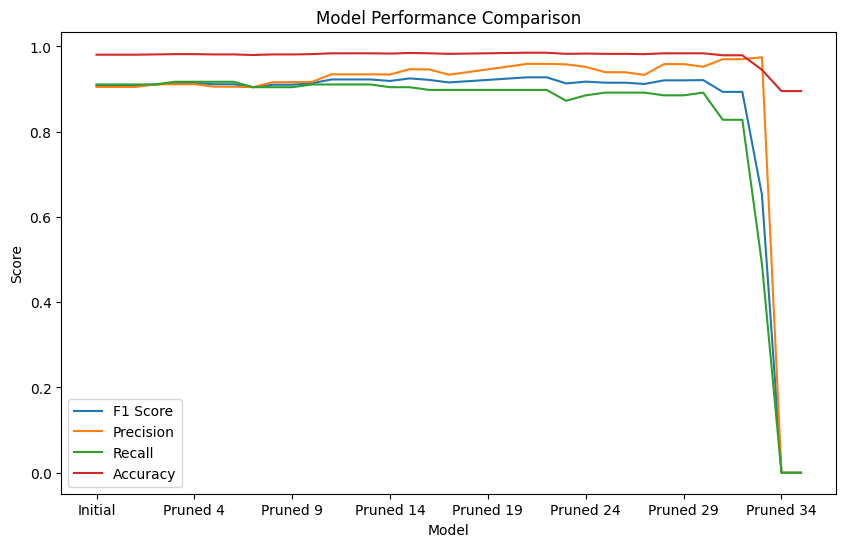

In [75]:
# Plot results
results_df.plot(x='Model', y=['F1 Score', 'Precision', 'Recall', 'Accuracy'], kind='line', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()

## Model Performance Comparison and Final Model Selection

In [78]:
# Select best pruned model
best_model_name = results_df.sort_values(by='F1 Score', ascending=False).iloc[0]['Model']
best_model = [model for name, model in zip(['Initial'] + [f'Pruned {i}' for i in range(len(dt_pruned_models))], [dtree] + dt_pruned_models) if name == best_model_name][0]

# Print Results
print(f"Best Model: {best_model_name}")
print(best_del_results)

SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (<ipython-input-78-9c8487e215e0>, line 7)

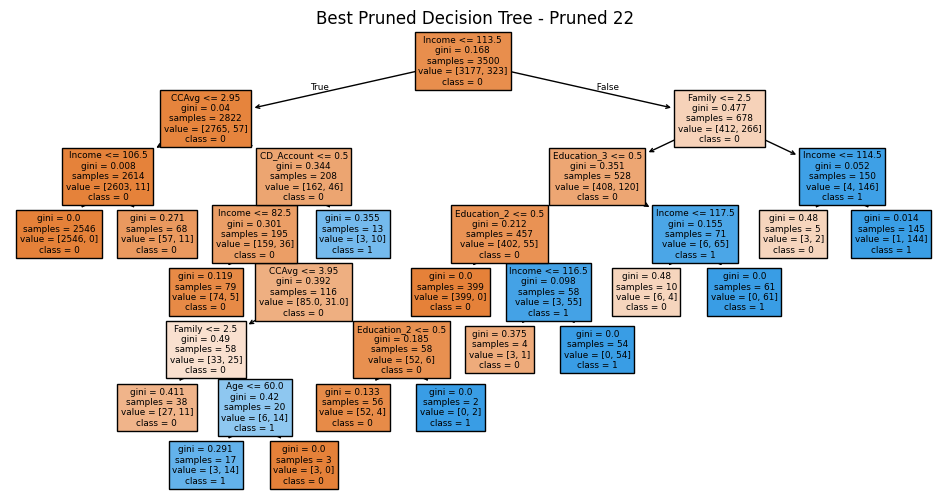

In [67]:
# Plotting the best pruned tree
plt.figure(figsize=(12, 6))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.title(f'Best Pruned Decision Tree - {best_model_name}')
plt.show()

In [72]:
#Show decision tree rules
print(tree.export_text(best_model, feature_names=list(X_train.columns), show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2546.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [57.00, 11.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- weights: [74.00, 5.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- CCAvg <= 3.95
|   |   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |   |--- weights: [27.00, 11.00] class: 0
|   |   |   |   |   |--- Family >  2.50
|   |   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |   |--- weights: [3.00, 14.00] class: 1
|   |   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.95
|   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |--- weights: [52.00, 4.00] class: 0
|   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |--- weights: [0.00,

Text(0.5, 14.722222222222216, 'Predicted label')

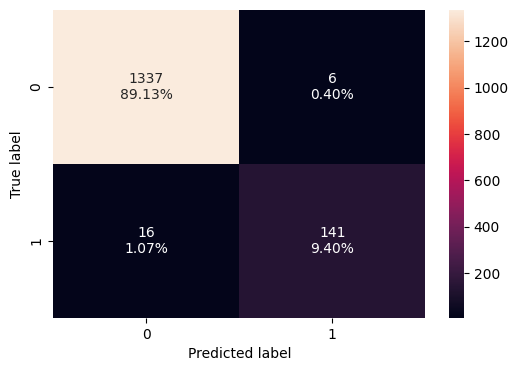

In [76]:
#checking pruned model performance on test data
y_pred = best_model.predict(X_test)
conf_mtrx_pruned = confusion_matrix(y_test, y_pred)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / conf_mtrx_pruned.flatten().sum())] for item in conf_mtrx_pruned.flatten()]).reshape(2, 2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mtrx_pruned, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")

## Actionable Insights and Business Recommendations


# Executive Summary: Predictive Model for Personal Loan Campaign

## Business Context
AllLife Bank aims to expand its personal loan customer base by converting existing deposit (liability) customers into loan (asset) customers. A previous marketing campaign achieved a 9% conversion rate. To enhance efficiency and boost conversions, a predictive model was developed to identify high-potential customers.

## Model Overview
A Decision Tree model was built and optimized using cost-complexity pruning. The final selected model (pruned at optimal complexity level = 22) demonstrated high accuracy and strong generalization:

- **Accuracy:** 98.5%  
- **Precision:** 95.9%  
- **Recall:** 89.8%  
- **F1 Score:** 92.8%  

These results suggest the model is highly reliable, especially in predicting true positives (likely loan buyers), making it well-suited for targeted marketing.

## Top Predictive Features
1. **Income** – Higher income strongly correlates with loan uptake  
2. **Family Size** – Families with 2–3 members are more likely to convert  
3. **Education** – Higher education levels correspond to greater likelihood of loan acceptance  
4. **CCAvg** – Higher average monthly credit card spending is a strong indicator of financial readiness  

## Recommendations

**Target Segment:** Focus on deposit customers with:
- Above-median income  
- Family size of 2–3 members  
- Graduate-level education or higher  
- CCAvg exceeding ~$1,500  

**Marketing Actions:**
- Tailor campaign messaging to reflect financial capability and lifestyle  
- Leverage digital channels for educated, high-spending users  
- Use model scores to prioritize outreach for maximum ROI  

## Expected Impact
- Improved campaign conversion beyond historical 9% baseline  
- Reduced cost per acquisition due to precision targeting  
- Strengthened cross-sell and retention strategy  

## Next Steps
- Deploy the model into marketing operations  
- Monitor uplift and iterate based on campaign results  
- Re-train model periodically to capture shifting behavior patterns  

___